# Time Series using LSTM

Author: Claudia Magliano

Date: 13/04/2024

# Recurrent Neural Network - LSTM
Airline Data


## Parte 1 - Preprocessamento de Dados

### Importar as bibliotecas

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# semente inicial
seed = 10
import random
np.random.seed(seed)
random.seed(seed)
import tensorflow
tensorflow.random.set_seed(seed)

### Import the database

In [109]:
dataset_train = pd.read_csv('train.csv')
dataset_train.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 to Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Train Data set has 10 years of data. Test data set has 2 years.

In [3]:
dataset_train.shape

(120, 2)

In [4]:
dataset_train.describe()

,International airline passengers: monthly totals in thousands. Jan 49 to Dec 60
count,120.000000
mean,245.908333
std,94.942087
min,104.000000
25%,170.750000
50%,233.500000
75%,313.500000
max,505.000000


In [110]:
training_set = dataset_train.iloc[:, 1:2].values  # só coluna da série em si
training_set[0:5]

# We a using dataset_train.iloc[:, 1:2] instead dataset_train.iloc[:, 1]
# to not change the structure (array of arrays)

array([[112],
       [118],
       [132],
       [129],
       [121]])

### Time Series Graph

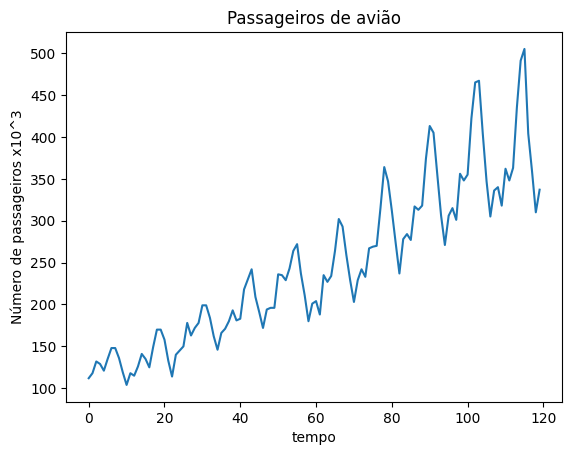

In [6]:
plt.plot(training_set)
plt.xlabel("tempo")
plt.ylabel("Número de passageiros x10^3")
plt.title("Passageiros de avião")
plt.show()

# Trend

In [7]:
ms = []
for line in dataset_train[dataset_train.columns[0]]:
  ms.append(line.split('-')[1])

In [8]:
print(ms, sep=' ')

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']


In [ ]:
# plt.figure(figsize=(20,5))
# sns.lineplot(x=range(len(dataset_train)), y=dataset_train.columns[1], hue=ms, data=dataset_train)
# plt.show()

Ajustar este gráfico! A ideia é avaliar o comportamento mensal ao longo dos anos. (uma reta para cada ano)

### Normalization

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
training_set_scaled = scaler.fit_transform(training_set)

In [49]:
training_set[0:2]

array([[112],
       [118]])

In [112]:
training_set_scaled[0:2]

array([[0.01995012],
       [0.03491272]])

### Create the data structure with window 10 and output 1

In [113]:
window = 10
trainSize = len(training_set_scaled)
X_train = []
y_train = []
for i in range(window , trainSize):
    X_train.append(training_set_scaled[i-window:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [114]:
training_set_scaled[0:11]

array([[0.01995012],
       [0.03491272],
       [0.06982544],
       [0.06234414],
       [0.04239401],
       [0.07730673],
       [0.10972569],
       [0.10972569],
       [0.0798005 ],
       [0.03740648],
       [0.        ]])

In [81]:
X_train[0]

array([0.01995012, 0.03491272, 0.06982544, 0.06234414, 0.04239401,
       0.07730673, 0.10972569, 0.10972569, 0.0798005 , 0.03740648])

In [52]:
y_train[0]

0.0

In [16]:
len(X_train)

110

In [82]:
len(y_train)

110

### Reshaping

In [115]:
X_train.shape

(110, 10)

In [116]:
y_train.shape

(110,)

lstm input shape = (batch_size, timesteps, features)

note: number_of_records, timesteps, features (batch_size we define in fit when training the network)

In keras, batch_size is actually defined in fit, and the first dimension becomes the number of records in the base.


In [117]:
# X_train = np.reshape(X_train, (X_train.shape[0], 5, 2))
X_train = np.reshape(X_train, (X_train.shape[0], 10, 1))

In [118]:
X_train.shape

(110, 10, 1)

## Parte 2 - Construção da RNN

### Bibliotecas necessárias

In [119]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Dropout desconsidera neurônios, sem perda de conhecimento, normalização da rede para evitar overfitting
# Normalmente utilizado somente no processo de treino. Pode ser utilizado
# no processo de inferência em alguns casos especificos como análise de incerteza

### Complete Network Construction

Using the Keras library, we can create a dense layer by specifying the number of desired neurons and the activation function to be used. A neural network is generally composed of several dense layers, interspersed with other layers, such as convolution layers, pooling layers, among others. This layered structure allows the neural network to learn and extract features from the data progressively, increasing the model's generalization capacity.

In [120]:
# Inicializar a RNN
# This LSTM has 3 layers

regressor = Sequential()

# Adicionar a primeira camada LSTM e Dropout
regressor.add(LSTM(units=100, return_sequences=True,
                   input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

# Adicionar a segunda camada LSTM e Dropout
regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.2))

# Adicionar a terceira camada LSTM e Dropout
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# camada de saída
regressor.add(Dense(units=1))

# Compilar a rede
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Visualizar a rede
regressor.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 10, 100)           40800     
                                                                 
 dropout_8 (Dropout)         (None, 10, 100)           0         
                                                                 
 lstm_9 (LSTM)               (None, 10, 80)            57920     
                                                                 
 dropout_9 (Dropout)         (None, 10, 80)            0         
                                                                 
 lstm_10 (LSTM)              (None, 50)                26200     
                                                                 
 dropout_10 (Dropout)        (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

The return_sequences parameter causes the LSTM layer to return all hidden states for all timesteps. You must set return_sequences=True when stacking LSTM layers so that the next layer has access to all hidden states.

### Tranning

In [121]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
es = EarlyStopping(patience=100)
rlr = ReduceLROnPlateau(patience=100)
mc = ModelCheckpoint(filepath='best.h5', save_best_only=True) # se quiser manter um tracking da época e do erro: 'best_{epoch:03d}-{val_loss:.4f}.h5'

history = regressor.fit(X_train, y_train, epochs = 1000, batch_size = 32, validation_split=0.1, callbacks=[es, mc, rlr])

Epoch 1/1000
4/4 [==============================] - 5s 362ms/step - loss: 0.1377 - val_loss: 0.1863 - lr: 0.0010
Epoch 2/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0350 - val_loss: 0.0386 - lr: 0.0010
Epoch 3/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0228 - val_loss: 0.0411 - lr: 0.0010
Epoch 4/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0134

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 15ms/step - loss: 0.0171 - val_loss: 0.0764 - lr: 0.0010
Epoch 5/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0234 - val_loss: 0.0694 - lr: 0.0010
Epoch 6/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0194 - val_loss: 0.0384 - lr: 0.0010
Epoch 7/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0172 - val_loss: 0.0372 - lr: 0.0010
Epoch 8/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0162 - val_loss: 0.0385 - lr: 0.0010
Epoch 9/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0146 - val_loss: 0.0392 - lr: 0.0010
Epoch 10/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0140 - val_loss: 0.0392 - lr: 0.0010
Epoch 11/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0143 - val_loss: 0.0394 - lr: 0.0010
Epoch 12/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0161 - val_loss: 0.0424 - lr: 0.0010
Ep

In [57]:
# history = regressor.fit(X_train, y_train, epochs=500, batch_size=32)  # (batch_size, ts, features)

Epoch 1/500
4/4 [==============================] - 3s 7ms/step - loss: 0.1647
Epoch 2/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0456
Epoch 3/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0345
Epoch 4/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0223
Epoch 5/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0239
Epoch 6/500
4/4 [==============================] - 0s 5ms/step - loss: 0.0269
Epoch 7/500
4/4 [==============================] - 0s 5ms/step - loss: 0.0192
Epoch 8/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0181
Epoch 9/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0195
Epoch 10/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0161
Epoch 11/500
4/4 [==============================] - 0s 5ms/step - loss: 0.0163
Epoch 12/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0166
Epoch 13/500
4/4 [==============================] - 0s 6ms/st

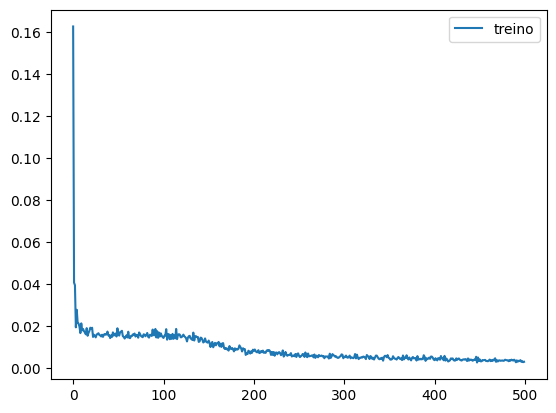

In [25]:
plt.plot(history.history['loss'], label='treino')
# plt.plot(history.history['val_loss'], label='validação')
plt.legend();

## Part 3 - Making predictions and analyzing results

### Test Base

In [122]:
dataset_test = pd.read_csv('test.csv')
test_airline = dataset_test.iloc[:, 1:2].values

In [59]:
test_airline.shape
# the test base has 2 years information: 24 months

(24, 1)

### Construir a estrutura para teste

In [123]:
dataset_total = pd.concat((dataset_train.iloc[:,1], dataset_test.iloc[:,1]), axis = 0)

In [124]:
len(dataset_total)

144

In [125]:
testLength = len(dataset_test)
inputs = dataset_total[len(dataset_total) - testLength - window:].values

# [len(dataset_total) - testLength - window: means [110:]. to pick up the 110 position to the end

In [94]:
inputs.shape
# Nou the test base has 34, 24 added by 10 years before

(34,)

Now we have to transfor a vector in a matrix to avoid error during the normalization. The method scaler.transform demands a matrix as input

In [126]:
inputs = inputs.reshape(inputs.shape[0],1)
inputs.shape

(34, 1)

Now, all the process has to be done with the test base:


# Reshape and normalization.

In [127]:
# normalization
inputs = scaler.transform(inputs)

# windowing
X_test = []
for i in range(window, inputs.shape[0]):
    X_test.append(inputs[i-window:i, 0])
X_test = np.array(X_test)

# reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [97]:
X_test.shape

(24, 10, 1)

### Make predictions

In [128]:
predicted_airline = regressor.predict(X_test)

1/1 [==============================] - 1s 921ms/step


In [129]:
predicted_airline

array([[0.6454274 ],
       [0.687412  ],
       [0.7044503 ],
       [0.75889003],
       [0.7984005 ],
       [0.90121293],
       [0.9856427 ],
       [1.2002587 ],
       [0.9129003 ],
       [0.6482995 ],
       [0.70256734],
       [0.6677759 ],
       [0.77461594],
       [0.79563963],
       [0.80463934],
       [0.8329544 ],
       [0.9165153 ],
       [1.0148973 ],
       [1.192717  ],
       [1.4095414 ],
       [0.9739922 ],
       [0.76028836],
       [0.8134364 ],
       [0.7267125 ]], dtype=float32)

In [130]:
# Now we have to desnormalize
predicted_airline = scaler.inverse_transform(predicted_airline)

In [131]:
predicted_airline[0:2]

# Resultados: 341 mil passageiros, 248 mil passageiros

array([[362.81638],
       [379.65222]], dtype=float32)

### Visualizar os resultados de treino e teste

4/4 [==============================] - 0s 3ms/step


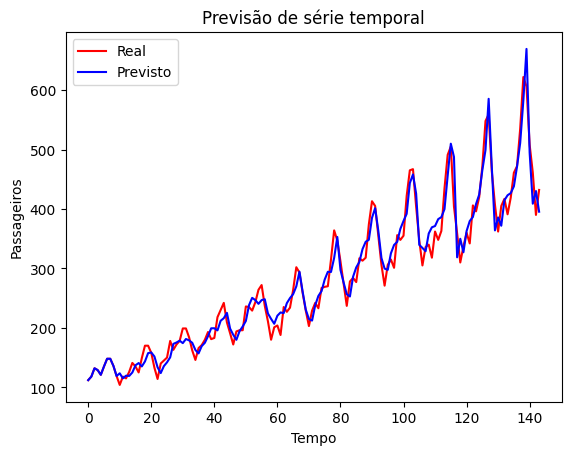

In [132]:
# preparação dos dados
allTargetData = np.vstack((training_set, test_airline)) # Actual data
training_predicted_airline = regressor.predict(X_train)
training_predicted_airline = scaler.inverse_transform(training_predicted_airline)
allForecastedData = np.vstack((training_set[0:window], # Forecast data
                               training_predicted_airline,
                               predicted_airline))

# plot
plt.plot(allTargetData, color='red', label='Real')
plt.plot(allForecastedData, color='blue', label='Previsto')
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Passageiros')
plt.legend()
plt.savefig('predictions_training_test.svg')
plt.show()

Remind that only the last 2 years were predicted

## Part 4 - Evaluation metrics

In [133]:
# Salvar real e previsto em um dataframe
results = pd.DataFrame()
results['real'] = np.reshape(test_airline, (24))
results['previsto'] = predicted_airline
results.to_csv('results.csv')
results.head(len(results))

#Show the actual values and the predicted values

,real,previsto
0,360,362.816376
1,342,379.652222
2,406,386.484558
3,396,408.314911
4,420,424.158600
5,472,465.386383
6,548,499.242706
7,559,585.303772
8,463,470.073029
9,407,363.968109


In [134]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_airline, predicted_airline))
print('RMSE: ', rmse)

RMSE:  30.46900656241492


In [135]:
mse = mean_squared_error(test_airline, predicted_airline)
print('MSE: ',mse)

MSE:  928.3603609004834


In [136]:
mape = np.mean(np.abs((test_airline - predicted_airline) / test_airline)) * 100
print('MAPE: ',mape, '%')
# Percentual error. Better when it is close to zero

MAPE:  5.511620277545528 %


In [137]:
from sklearn.metrics import r2_score
r2 = r2_score(test_airline,predicted_airline)
print('R2: ', r2)

#Coefficient of determination, the closer to 1, the better.

R2:  0.8335283515706262


# Exercício

1. Tentar diferentes arquiteturas, número de neurônios, épocas, batch_size, otimizadores, etc...
2. Separar conjunto de validação 10%
3. Callback: ModelCheckpoint
4. Callback: Early Stopping e ReduceLearningRateOnPlateau
5. Mudar janela
6. Utilizar gráficos de autocorrelação para definir lag de entrada
7. Avaliar melhor modelo salvo em best.h5
8. Shape de input da LSTM
9. Prever 12 meses de 1961 (dados que não temos)
10. Usar codificação do mês como input da rede (inteiro?, binário?)
